# Algorytm najszybszego spadku dla regresji wielomianowej

Algorytm przyjmuje zbiór danych - x oraz y i próbuje wyzaczyć funkcję wilomianową, która najlepiej przewiduje wartości y na podstawie x. Wynikiem jest wyznaczenie współczynników wielomianu.

### Importy

In [67]:
from matplotlib import pyplot as plt
import numpy as np
import random

### Początkowe współczynniki
Tworzymy losowe początkowe współczynniki wielomianu - od nich algorytm rozpocznie dopasowanie. Oraz oryginalne współczynniki na podstawie których zostanie wyznaczony zbiór danych. Aby zmienić generowany zbiór danych należy zmienić tablicę coeffs.

In [68]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10,10))
coeffs = [2, -5, 4] # a, b, c
#coeffs = [17, -8, 4] # a, b, c

k = input("Podaj stopień wielomianu: ")
k = int(k)
print(k)

2


### Wyznaczenie wartości wielomianu
Funkcja na podstawie współczynników oraz x wyznacza wartość y wielomianu.

In [69]:
def eval_2nd_degree(coeffs, x, k):
    a = (coeffs[0]*(x**k))
    b = coeffs[1]*(x**(k-1))
    c = coeffs[2]

    y = a+b+c
    return y

#eval_2nd_degree(coeffs, 3, 4)
    

### Wartości wielomianu z szumem
Funkcja jest analogiczna do poprzedniej - wyznacza wartość wielomianu na podstawie wpółczynników oraz x, ale dodatkowo dodaje szum do wyjściowych wartości - funkcja zostanie użyta przy generowaniu danych.

In [70]:
def eval_2nd_degree_jitter(coeffs, x, j):
    y = eval_2nd_degree(coeffs, x, k)
    
    interval_min = y-j
    interval_max = y+j
    
    return random.uniform(interval_min, interval_max)

### Wygenerowanie danych
Kod generuje zbiór danych. Na podstawie wartości x od -10 do 10 i losowych współczynników wielomianu generuje wartości y z szumem. Parametr j określa jak moco dane będą zaszumione

[ 1.93805554 -7.14146898  4.80847965  6.7923386  -4.9820572  -8.36721666
 -3.03590771  7.10302797  3.6567952  -4.61893312 -7.77544379  4.33448858
 -0.84984343 -0.4818275   7.11385026 -9.51525895 -4.38281891  8.47750482
  8.4505284  -2.03857269  6.43008266  9.91978403  9.68784877 -6.51416545
 -9.46191372  9.53098301 -3.26192799  4.78375147 -0.48803478  4.2719198
  7.87940586 -9.71405924 -8.59615622 -0.99001719 -5.70862611  4.81815229
 -4.75636826  3.00461241  8.0931194  -8.73839205  3.5703026  -1.70997658
  8.397044   -7.13453958 -5.68033115  6.43496878  0.63967305  3.47292048
 -1.96283003 -5.96053698  7.02062456  6.6672641   1.14217053 -9.21276365
  4.7201797  -5.29291118  3.36596207  4.81029689 -6.72797697  0.21795055
 -9.81276562  1.06328435  7.70633934  4.66017061 -2.2623938  -7.86967321
 -2.87083371 -2.75685526  6.93841449 -2.01111387 -7.23430145  4.37277354
  0.88088525  8.62278739 -9.56199168  9.86296681 -6.41765534 -9.41510031
  3.27903273  4.84209117  3.0707047   3.82251549  6.

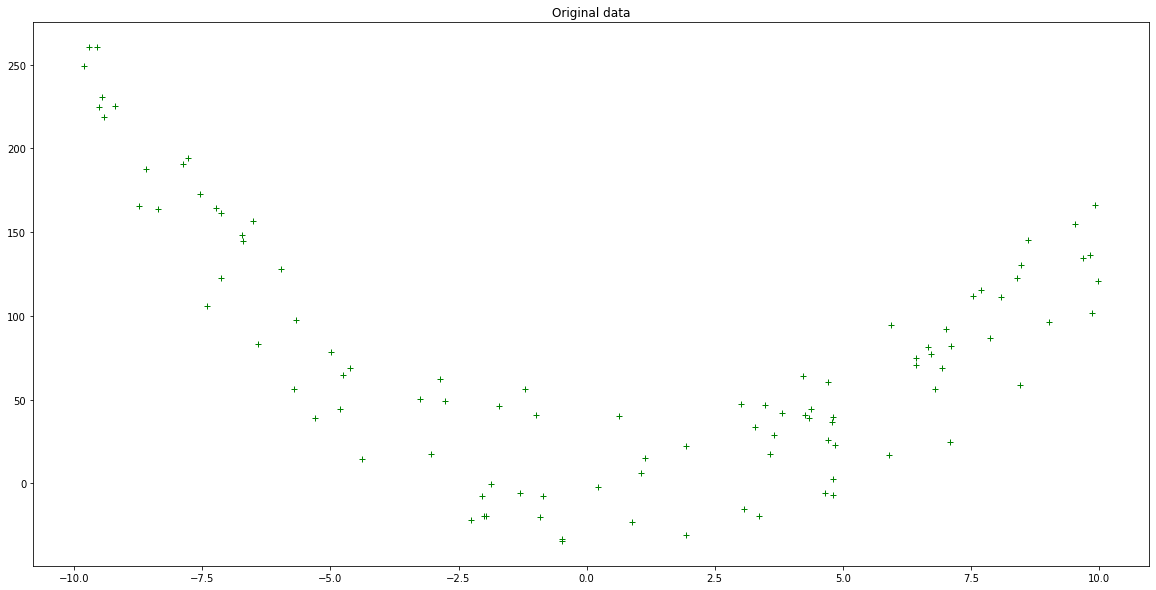

In [71]:
hundred_xs=np.random.uniform(-10,10,100)
print(hundred_xs)

j=50
x_y_pairs = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, j)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

### Funkcja straty
Do określenia jak mocno przewidziane wartości y są różne zostanie użyta kwadratowa funkcja straty.

In [72]:
def loss_mse(ys, y_bar):
    return sum((ys - y_bar)*(ys - y_bar)) / len(ys)

### Gradient
Funkcja przyjmuje współczynniki wielomianu, x, y oraz parametr prękości uczenia i wylicza za pomocą gradientu nowe wartości współczynników wielomianu.

In [73]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr, k): 
    a_s = []
    b_s = []
    c_s = []
        
    y_bars = eval_2nd_degree(coeffs, inputs_x, k)


    # tu zamiast 2 dodałem k i w potencial_b k-1, czy tylko to powinno byś zmiaenione?
    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**k      
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x**(k-1) * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    
    new_model_coeffs = (a_new, b_new, c_new)
    
    #update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x, k)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

### Minimalizacja
Funkcja powtarza proces wyznaczenia nowych współczynników wielomianu zadaną ilość razy - epoch.

In [74]:
def gradient_descent(epochs, lr):
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr, k)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    #print(losses)
    return loss[0], loss[1], loss[2], losses  #(updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

### Uruchomienie
Wartości wyznaczonego wielomionu zostają wyświetlone na wykresie z porównaniem do zbioru danych.

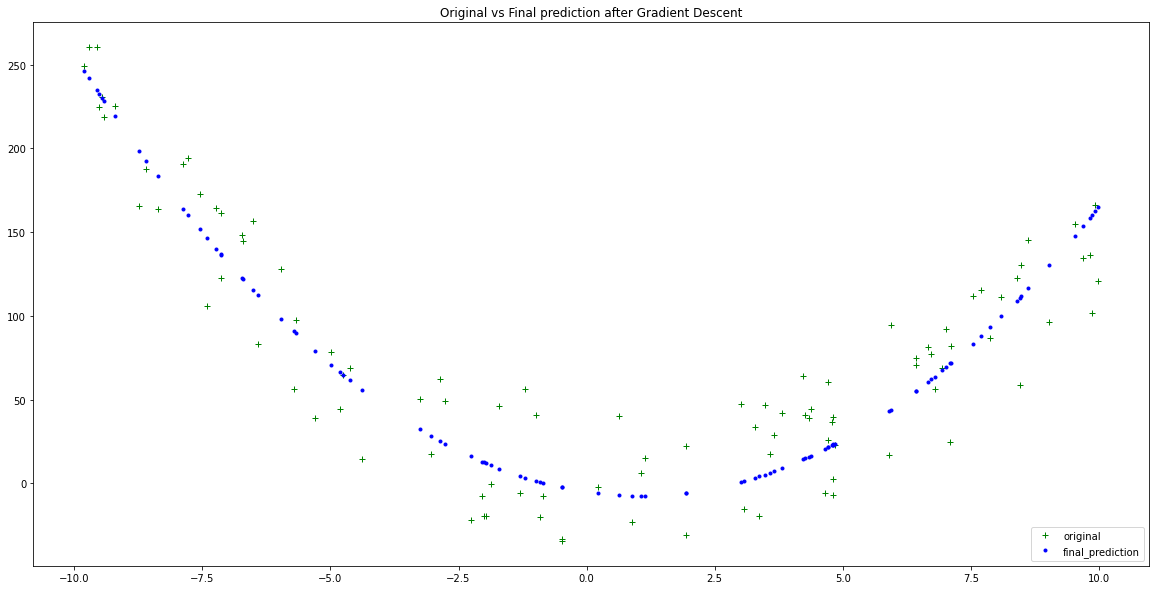

In [75]:
GD = gradient_descent(1500, 0.0001)

plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

### Wyznaczone współczynniki wielomianu

In [76]:
print("Początkowe współczynniki {}".format(rand_coeffs))
print("Wyznaczone współczynniki {}".format(GD[1]))
print("Oryginalne współczynniki {}".format(coeffs))

Początkowe współczynniki (7, 5, -6)
Wyznaczone współczynniki (2.1546532016162714, -4.490001059494276, -5.122120484596819)
Oryginalne współczynniki [2, -5, 4]


### Funkcja straty
Wykres przedstawia jak zmianiała się wartość funkcji straty w kolejnych krokach algorytmu.

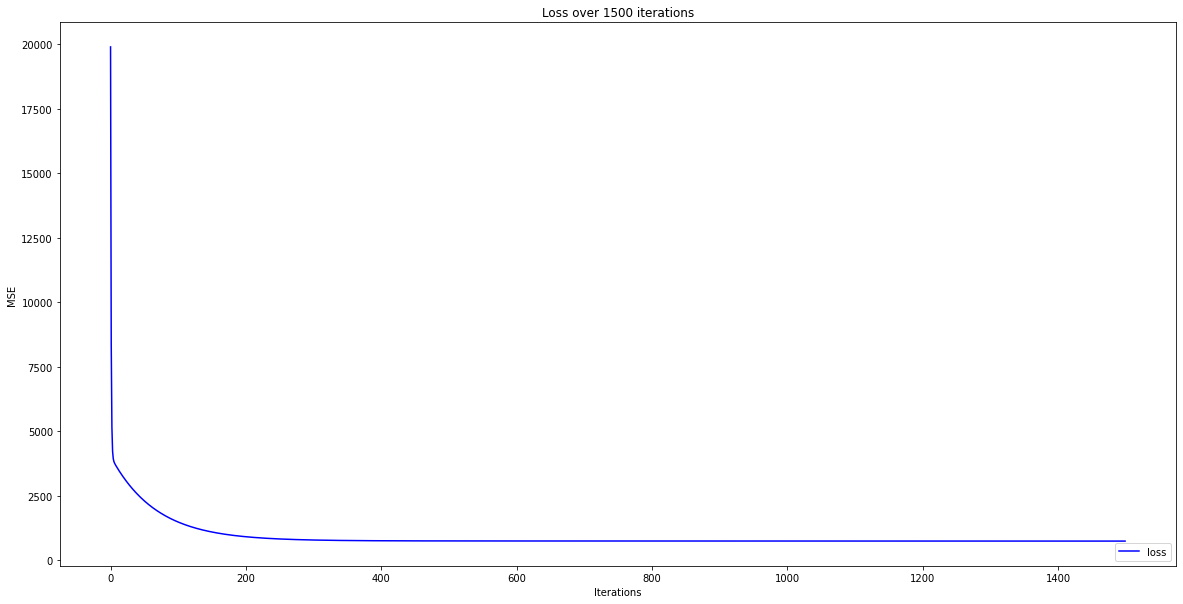

In [77]:
plt.figure(figsize=(20,10))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 1500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()